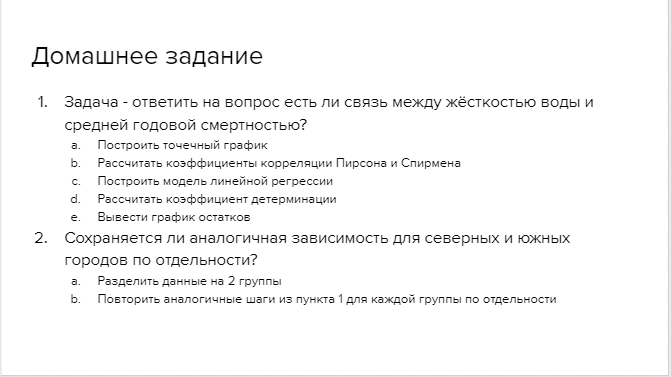

# Задание 1.
***Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**
- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

# Задание 2.
***Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?***
- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

Датасет с данными по жесткости воды – [Mortality and Water Hardness](https://www.kaggle.com/ukveteran/mortality-and-water-hardness)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./water.csv', index_col=0)
df.head()

,location,town,mortality,hardness
1,South,Bath,1247,105
2,North,Birkenhead,1668,17
3,South,Birmingham,1466,5
4,North,Blackburn,1800,14
5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

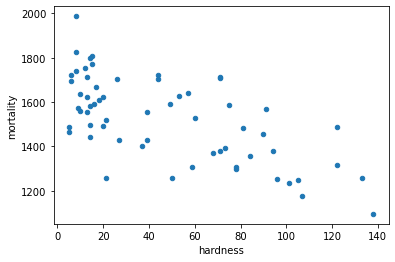

In [3]:
df.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

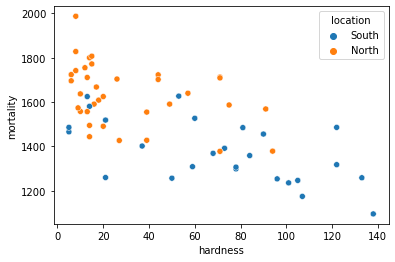

In [4]:
sns.scatterplot(data=df, x='hardness', y='mortality', hue='location')

In [5]:
df.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [6]:
df.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df[['hardness']], df[['mortality']], train_size=0.7)

In [82]:
model = LinearRegression()

In [83]:
model.fit(X_train, y_train)

LinearRegression()

Mortality value when water hadness equal to 0.

Значение смертности при жесткости воды равной 0.

In [84]:
model.intercept_

array([1661.98969155])

Изменение смертности при изменении жесткости на 1 в положительную сторону.

In [85]:
model.coef_

array([[-2.99324663]])

Коэффициент детерминации

In [86]:
model.score(X_test, y_test)

0.5238237482699695

In [152]:
y_pred = model.predict(X_test)
# y_PRED = model.predict(X_train)

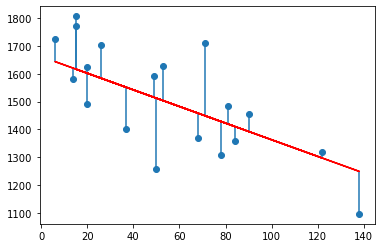

In [155]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')
plt.vlines(X_test, y_pred, y_test)
# plt.scatter(X_train, y_train, color='m')
# plt.vlines(X_train, y_PRED, y_train, color='magenta')


Исходя из нашего исследования мы можем сказать, что существует обратная зависимость между жесткосью воды и смертностью.<br>
Чем мягче вода - тем больше смертность на данном наборе данных. Для проверки гипотезы необходимы выборки с других регионов(стран)

## Анализ данных в зависимости от региона

**Разделим данные на две группы и проведем анализ для каждой**

In [41]:
df['location'].unique()

array(['South', 'North'], dtype=object)

In [42]:
dfS = df[df['location'] == 'South']
dfN = df[df['location'] == 'North']

### South group

In [43]:
dfS.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [44]:
dfS.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

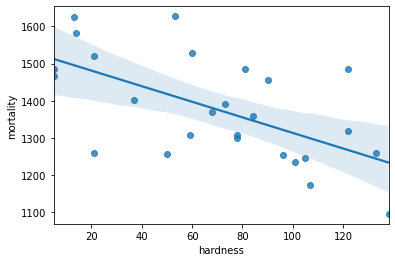

In [89]:
sns.regplot(data = dfS, x='hardness', y='mortality')

In [114]:
XS_train, XS_test, yS_train, yS_test = train_test_split(dfS[['hardness']], dfS[['mortality']], train_size=0.7)

In [115]:
modelS = LinearRegression()

In [116]:
modelS.fit(XS_train, yS_train)

LinearRegression()

Коэффициент детерминации

In [117]:
modelS.score(XS_test, yS_test)

0.26956705367513245

In [126]:
yS_pred = model.predict(XS_test)
yS_PRED = model.predict(XS_train)

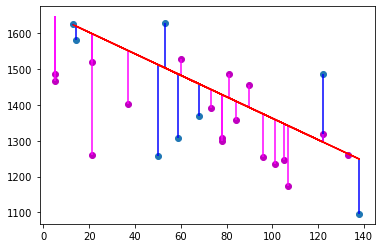

In [150]:
plt.scatter(XS_test, yS_test)
plt.plot(XS_test, yS_pred, color='r')
plt.vlines(XS_test, yS_pred, yS_test, color='blue')
plt.scatter(XS_train, yS_train, color='m')
plt.vlines(XS_train, yS_PRED, yS_train, color='fuchsia')

### North group

In [29]:
dfN.corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [30]:
dfN.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

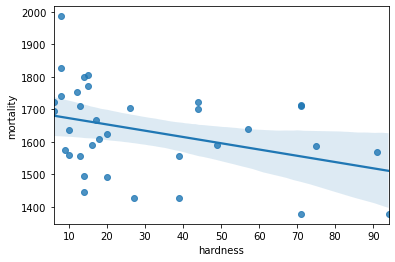

In [31]:
sns.regplot(data = dfN, x='hardness', y='mortality')

In [32]:
XN_train, XN_test, yN_train, yN_test = train_test_split(dfN[['hardness']], dfN[['mortality']], train_size=0.7)

In [33]:
modelN = LinearRegression()

In [34]:
modelN.fit(XN_train, yN_train)

LinearRegression()

In [35]:
modelN.intercept_

array([1665.36844864])

In [36]:
modelN.coef_

array([[-1.42267708]])

*Коэффициент детерминации*

In [37]:
modelN.score(XN_test, yN_test)

0.10492475741342888

In [131]:
yN_pred = model.predict(XN_test)
yN_PRED = model.predict(XN_train)

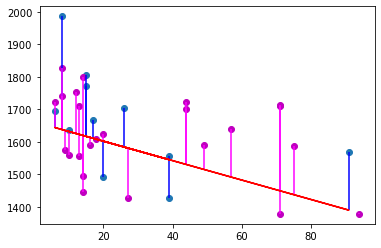

In [148]:
plt.scatter(XN_test, yN_test)
plt.plot(XN_test, yN_pred, color='red')
plt.vlines(XN_test, yN_pred, yN_test, color='blue')
plt.scatter(XN_train, yN_train, color='m')
plt.vlines(XN_train, yN_PRED, yN_train, color='fuchsia')

В целом зависимость сохраняется, но она уже менее выражена.

К тому-же модель только для одного региона работает хуже, как один из факторов - мало данных для регионов по отдельности.